In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('logs/bo_runs_data_tempswing_Vext.csv')
doto = pd.read_csv('logs/gp_summary_data_tempswing_Vext.csv', on_bad_lines='skip')


In [9]:
counts = data['found_global_best'].value_counts()
print(counts)

found_global_best
True     39
False     1
Name: count, dtype: int64


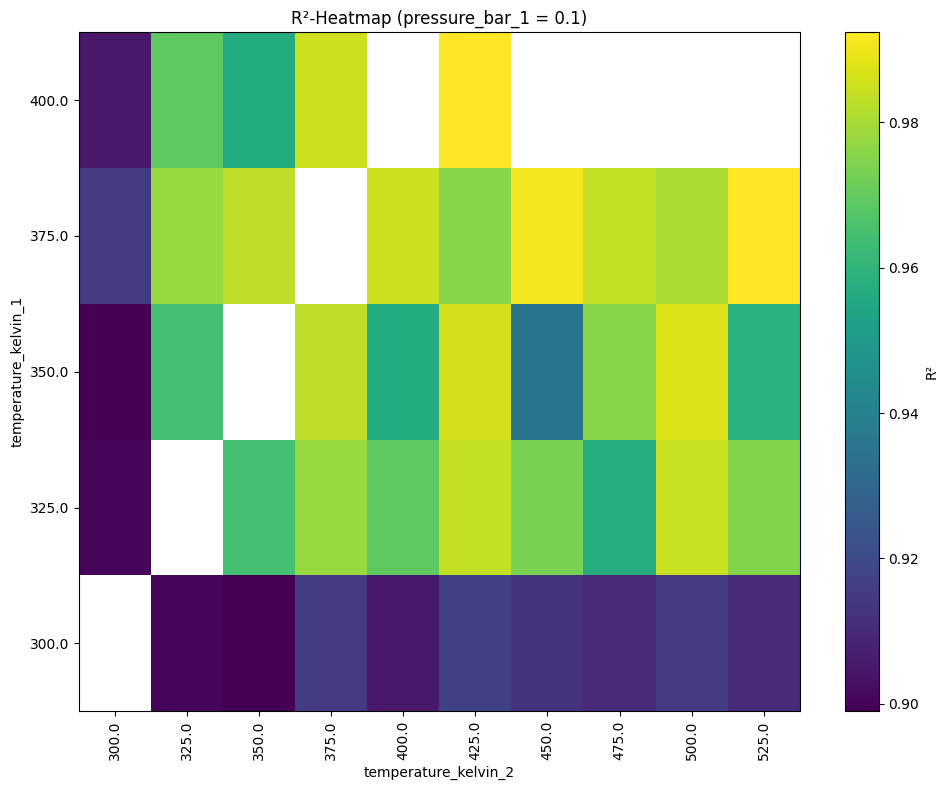

In [10]:
pressures = np.sort(doto["pressure_bar_1"].unique())

for p in pressures:
    # 2) Nicht das Original-DF überschreiben; Subset je Druck bauen
    sub = doto[doto["pressure_bar_1"].eq(p)]

    if sub.empty:
        continue  # falls numerische Toleranzen o.ä.

    # 3) Pivot-Table (optional: Mittelwert bei Duplikaten)
    heatmap_data = sub.pivot_table(
        index="temperature_kelvin_1",
        columns="temperature_kelvin_2",
        values="r2",
        aggfunc="mean"
    )

    # Optional: sortierte Achsen (macht die Heatmap „ordentlicher“)
    heatmap_data = heatmap_data.sort_index().sort_index(axis=1)

    # 4) Plot
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap_data.values, aspect='auto', origin='lower')
    plt.colorbar(label='R²')

    plt.title(f"R²-Heatmap (pressure_bar_1 = {p})")
    plt.xlabel("temperature_kelvin_2")
    plt.ylabel("temperature_kelvin_1")

    # Achsen-Ticks passend zu den DataFrame-Achsen setzen
    plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
    plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

    plt.tight_layout()
    plt.show()

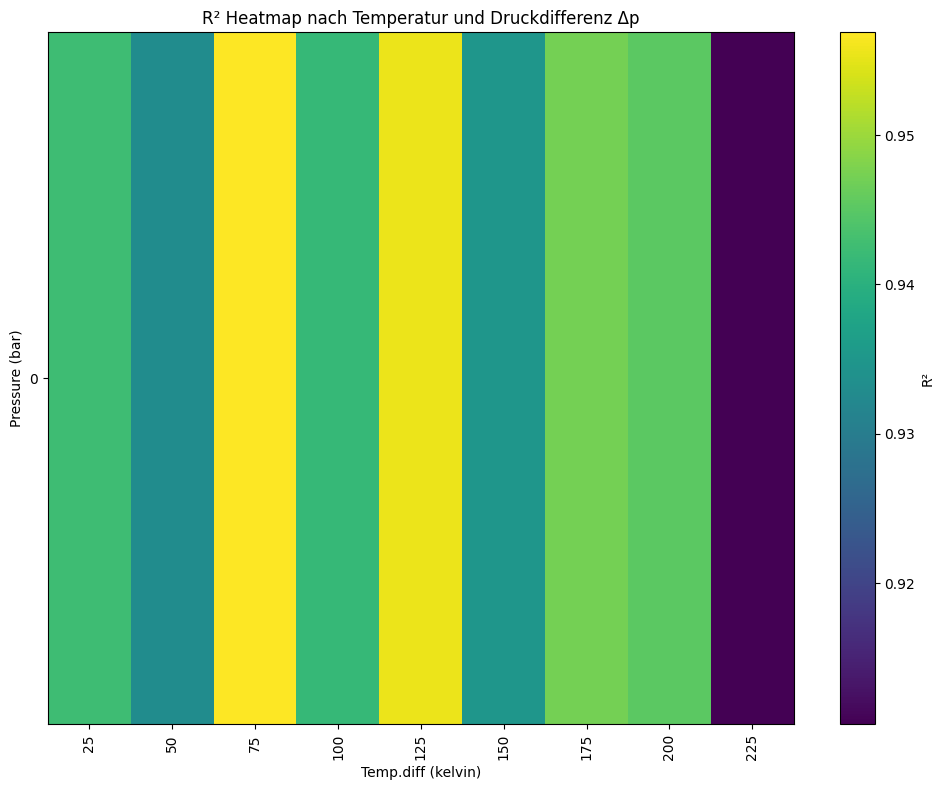

In [4]:
doto["delta_t"] = (doto["temperature_kelvin_2"] - doto["temperature_kelvin_1"]).abs()

# --- Pivot-Tabelle: Temperatur vs Δp ---
heatmap_data = doto.pivot_table(
    index="pressure_bar_1",   # Y-Achse
    columns="delta_t",            # X-Achse
    values="r2",                  # Farbe repräsentiert R²
    aggfunc="mean"                # Mittelwert, falls mehrere Kombinationen
)

# --- Sortierung (optional, für saubere Achsen) ---
heatmap_data = heatmap_data.sort_index().sort_index(axis=1)

# --- Plot ---
plt.figure(figsize=(10, 8))
im = plt.imshow(heatmap_data, aspect="auto", origin="lower", cmap="viridis")
plt.colorbar(im, label="R²")

plt.title("R² Heatmap nach Temperatur und Druckdifferenz Δp")
plt.xlabel("Temp.diff (kelvin)")
plt.ylabel("Pressure (bar)")

# Achsenbeschriftungen mit tatsächlichen Werten
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns.astype(int), rotation=90)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index.astype(int))

plt.tight_layout()
plt.show()

In [5]:
data=data[data["found_global_best"]==True]

In [6]:
data

,timestamp,temperature_kelvin_T1,temperature_kelvin_T2,pressure_bar_1,pressure_bar_2,n_candidates,n_iterations,best_value,global_best_value,found_global_best
0,2025-11-11T10:51:42,300.0,325.0,0.1,0.1,245,24,0.000998,0.000998,True
1,2025-11-11T10:51:52,300.0,350.0,0.1,0.1,245,37,0.001635,0.001635,True
2,2025-11-11T10:52:01,300.0,375.0,0.1,0.1,245,28,0.002033,0.002033,True
3,2025-11-11T10:52:09,300.0,400.0,0.1,0.1,245,24,0.002214,0.002214,True
4,2025-11-11T10:52:16,300.0,425.0,0.1,0.1,245,22,0.002301,0.002301,True
5,2025-11-11T10:52:24,300.0,450.0,0.1,0.1,245,25,0.002345,0.002345,True
6,2025-11-11T10:52:32,300.0,475.0,0.1,0.1,245,21,0.002369,0.002369,True
7,2025-11-11T10:52:40,300.0,500.0,0.1,0.1,245,26,0.002383,0.002383,True
8,2025-11-11T10:52:47,300.0,525.0,0.1,0.1,245,22,0.002392,0.002392,True
9,2025-11-11T10:52:55,325.0,300.0,0.1,0.1,245,24,0.000998,0.000998,True


In [7]:
doto

,run_started_at,timestamp,temperature_kelvin_1,temperature_kelvin_2,pressure_bar_1,pressure_bar_2,n_rows,r2,median_APE_pct,mean_APE_pct,count_APE_gt_20pct,max_APE_pct,folds,delta_t
0,2025-11-11T10:51:33,2025-11-11T10:51:37,300.0,325.0,0.1,0.1,245,0.900494,6.749531,3.358320e+05,52,8.227146e+07,"1,2,3,4,5,6,7,8,9,10",25.0
1,2025-11-11T10:51:33,2025-11-11T10:51:46,300.0,350.0,0.1,0.1,245,0.898943,7.948038,3.371704e+01,49,1.610184e+03,"1,2,3,4,5,6,7,8,9,10",50.0
2,2025-11-11T10:51:33,2025-11-11T10:51:56,300.0,375.0,0.1,0.1,245,0.915438,5.424014,6.142038e+05,38,1.440630e+08,"1,2,3,4,5,6,7,8,9,10",75.0
3,2025-11-11T10:51:33,2025-11-11T10:52:05,300.0,400.0,0.1,0.1,245,0.905382,6.875800,5.168025e+05,42,1.266014e+08,"1,2,3,4,5,6,7,8,9,10",100.0
4,2025-11-11T10:51:33,2025-11-11T10:52:13,300.0,425.0,0.1,0.1,245,0.916913,6.055303,9.917839e+05,36,2.429809e+08,"1,2,3,4,5,6,7,8,9,10",125.0
5,2025-11-11T10:51:33,2025-11-11T10:52:20,300.0,450.0,0.1,0.1,245,0.912648,5.528268,1.464300e+06,41,3.586436e+08,"1,2,3,4,5,6,7,8,9,10",150.0
6,2025-11-11T10:51:33,2025-11-11T10:52:28,300.0,475.0,0.1,0.1,245,0.910041,6.189757,3.278164e+06,42,8.031361e+08,"1,2,3,4,5,6,7,8,9,10",175.0
7,2025-11-11T10:51:33,2025-11-11T10:52:35,300.0,500.0,0.1,0.1,245,0.915393,5.356800,6.547853e+06,35,1.603176e+09,"1,2,3,4,5,6,7,8,9,10",200.0
8,2025-11-11T10:51:33,2025-11-11T10:52:43,300.0,525.0,0.1,0.1,245,0.910549,6.246238,1.735573e+06,38,4.252025e+08,"1,2,3,4,5,6,7,8,9,10",225.0
9,2025-11-11T10:51:33,2025-11-11T10:52:51,325.0,300.0,0.1,0.1,245,0.900494,6.749531,3.358320e+05,52,8.227146e+07,"1,2,3,4,5,6,7,8,9,10",25.0
